Henry (Hank Besser)

Importing the NumPy and PlyPlot modules and assigning them shorter, more useable aliases (i.e. np and plt, respectively). Also making sure the figures show up inline using a magic function (%matplotlib inline) for overall coherency of the report.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

---------------------------------------------------------------------
#### Problem under study: 

In regards to the chaotic behavor of a pendulum, chaos is only found when the pendulum is nonlinear, damped, and there is a driving force. However, it is important to look at the problem of chaotic behavior from a broader perspective: that is considering what other simple equations of motion are capable of chaotic behavior.

A different type of system from the pendulum is the logistic map. The model of the system is modeled by the following relation:

$$ Equation 1: x_{n+1} =  \mu x_{n}(1-x_{n}) $$

Where $x_{n}$ can be thought of, when generalized,, as the size of the population being studied in generation $n$ (i.e at step $n$), while $\mu$ is a fixed parameter related to controlling the rate of population growth (e.g. population growth or loss). This simple equation of motion (Equation 1) is a discrete map and allows for a deep insight into the problem of chaos when investigating the logistic map.  

#### Methods and Thorough Descriptions in the Code

In [2]:
def logistic_map(x_0,n_0, n_f, mu): 
    """
    General behavior of a logistic map. 
    
    Used for visualizing x_n vs. n for a certain value of mu, 
    in range n_0 to n_f, and starting with x0
    
    Model is defined by relation-- x_(n+1) = mu*x_n*(1-x_n)
    """
    
    # total time with with n_f-n_0 generations (i.e steps)
    n_array = np.linspace(n_0, n_f, int(n_f-n_0)+1)         
    
    x_array = np.zeros(n_array.size) #zero array
    x_array[0]= x_0  # initial x
    
    for i in range(0, int(n_f-n_0)):
        x_array[i+1] = mu * x_array[i] * (1.0 - x_array[i])
        
    return n_array, x_array  #gathering data that is needed  

In [3]:
def iteration(x_0,n_0, n_f, mu): 
    """
    Fill an array with an iteration of steady state (n>>1) x_n values
    as a function of mu at a specified mu value. The individual iterations 
    are represented by vertical slices. 
    
    Used for visualzing x_n vs. mu for a 
    certain value of mu, in range n_0 to n_f, and starting with x0   
    
    This function is called by the bifurcation_diagram to iterate  
    
    Model is defined by relation x_(n+1) = mu*x_n*(1-x_n)
    
    """
    # total time with with n_f-n_0 generations (i.e steps)
    n_array = np.linspace(n_0, n_f, int(n_f-n_0)+1)          
    
    x_array = np.zeros(n_array.size) #zero array
    x_array[0]= x_0  # initial x
    
    mu_array= np.zeros(n_array.size) #zero array 
    mu_array= mu_array+mu #all elements in mu_array set to value of mu
    
    
    for i in range(0, int(n_f-n_0)):
        x_array[i+1] = mu * x_array[i] * (1.0 - x_array[i])
        
    return mu_array, x_array #gathering data that is needed     

In [4]:
def bifurcation_diagram(x_0,n_0,n_f,step_size): 
    """
    Plot the iterated logistic map for all the mu values from 1..4
    with an iteration range of n_0 to n_f and step value of step_size 
    
    """
    
    for i in np.arange(1,4,step_size):
        
        # get the array of iterations from iteration function
        mu_array, x_array = iteration(x_0=x_0,n_0=n_0, n_f=n_f,mu=i)      
        
        # decrease size of points for creating the plot
        plt.plot(mu_array[300:-1],x_array[300:-1],'r.',markersize=1)
    ax = plt.gca()
    ax.legend((""),title='Step Size = {0}'.format(step_size),fontsize=12, loc= 2)

#### Analysis

------------------------------------------

Now plotting the $x_{n}$ vs. $n$ for different $\mu$ values. There is also a plot to observe all 3 maps on one plot alongside a logisitic map with chaotic behavior ($\mu$ = 3.8). 

In [5]:
                            # Paremeters 
n_array1, x_array1 = logistic_map(x_0=0.3,n_0=0, n_f=100, mu=2.0)
n_array2, x_array2 = logistic_map(x_0=0.3,n_0=0, n_f=100, mu=3.1)
n_array3, x_array3 = logistic_map(x_0=0.3,n_0=0, n_f=100, mu=3.5)
n_array3_8, x_array3_8 = logistic_map(x_0=0.3,n_0=0, n_f=100, mu=3.8)

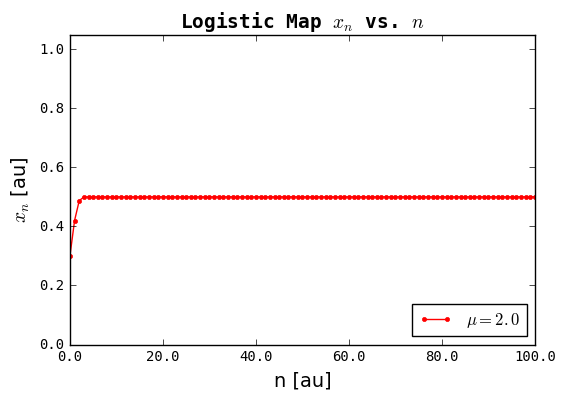

In [6]:
#Part 1, x_n vs. n: when mu = 2.0
plt.figure()

plt.plot(n_array1, x_array1,"r.-")
ax = plt.gca()

ax.set_title('Logistic Map $x_{n}$ vs. $n$',\
family='monospace',size=14, weight='bold')

ax.set_xlabel('n [au]',fontsize =14)
ax.set_ylabel('$x_{n}$ [au]',fontsize =14)

ax.set_ylim(bottom=0, top=1.05)

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("$\mu = 2.0$",),fontsize=12, loc= 4)

plt.show()

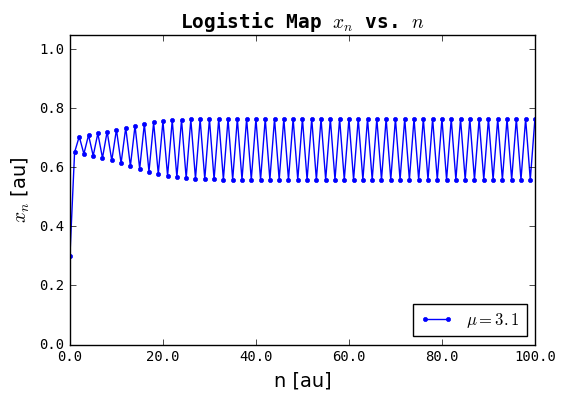

In [7]:
#Part 1, x_n vs. n: when mu = 3.1
plt.figure()


plt.plot(n_array2, x_array2,"b.-")
ax = plt.gca()

ax.set_title('Logistic Map $x_{n}$ vs. $n$',\
family='monospace',size=14, weight='bold')

ax.set_xlabel('n [au]',fontsize =14)
ax.set_ylabel('$x_{n}$ [au]',fontsize =14)

ax.set_ylim(bottom=0, top=1.05)

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("$\mu = 3.1$",),fontsize=12, loc= 4)

plt.show()

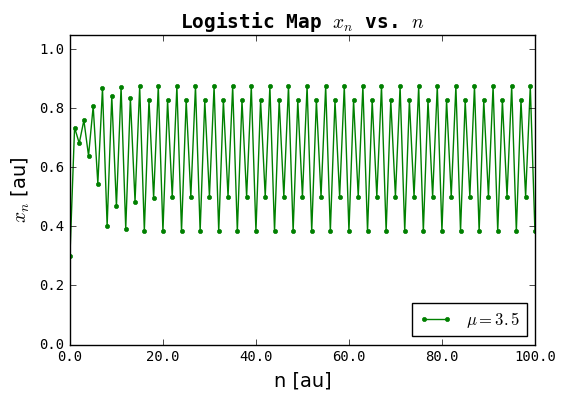

In [8]:
#Part 1, x_n vs. n: when mu = 3.5

plt.figure()


plt.plot(n_array3, x_array3,"g.-")
ax = plt.gca()

ax.set_title('Logistic Map $x_{n}$ vs. $n$',\
family='monospace',size=14, weight='bold')

ax.set_xlabel('n [au]',fontsize =14)
ax.set_ylabel('$x_{n}$ [au]',fontsize =14)

ax.set_ylim(bottom=0, top=1.05)

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("$\mu = 3.5$",),fontsize=12, loc= 4)

plt.show()

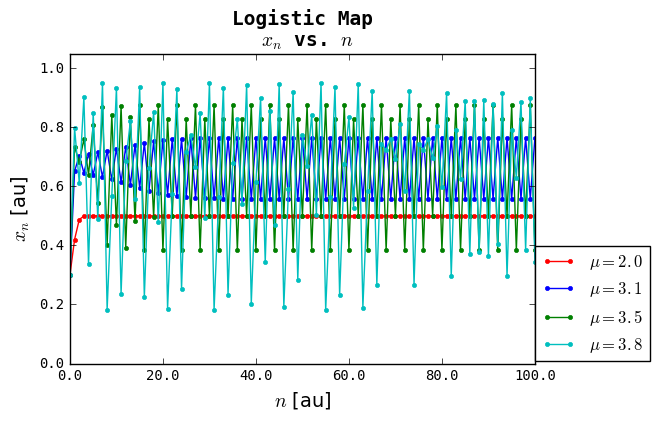

In [9]:
#Part 1, x_n vs. n: when mu = 2.0, 3.1, 3.5, and 3.8 in same plot
plt.figure()

plt.plot(n_array1, x_array1,"r.-",n_array2,\
         x_array2,"b.-",n_array3, x_array3,"g.-",n_array3_8, x_array3_8,"c.-")
ax = plt.gca()

ax.set_title("Logistic Map\n $x_{n}$ vs. $n$",\
family='monospace',size=14, weight='bold')

ax.set_xlabel('$n$ [au]',fontsize =14)
ax.set_ylabel('$x_{n}$ [au]',fontsize =14)

ax.set_ylim(bottom=0, top=1.05)

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("$\mu = 2.0$","$\mu = 3.1$","$\mu = 3.5$","$\mu = 3.8$",),fontsize=12,
          loc= 4, bbox_to_anchor=(1.265, -0.02))

plt.show()

Figure 1: 
-----------------------------------------
Behavior of $x_{n}$ as a function of $n$ for several different values of $\mu$. For $\mu$ = 2.0 the population ($x_{n}$) level reaches a fixed point (0.5). For $\mu$ = 3.1 the logistic map has non-chaotic behavior, the system is in the period-2 regime, and the population ($x_{n}$) approaches permanent oscillations between two values. For $\mu$ = 3.5, the system oscillates over four population-values, which is seen in the plot of all the sets, and is twice the fluctuation period for when $\mu$ = 3.5. Also seen in the plot of all the sets, at $\mu$ = 3.8 the behavior is chaotic. The values of $x_{n}$ are represented by the dots and the lines are merely to help visualize the logistic maps.   

Now plotting the steady state (n>>1) for $x_{n}$ as a function of mu at specified mu values. Using the iteration function,  the individual iterations in the plot are represented by vertical slices. 

In [10]:
                                        # Paremeters 
mu_array1, x_array4 = iteration(x_0=0.3,n_0=0, n_f=400, mu=3.5) 
mu_array2, x_array5 = iteration(x_0=0.3,n_0=0, n_f=400, mu=3.6) 
mu_array3, x_array6 = iteration(x_0=0.3,n_0=0, n_f=400, mu=3.7) 

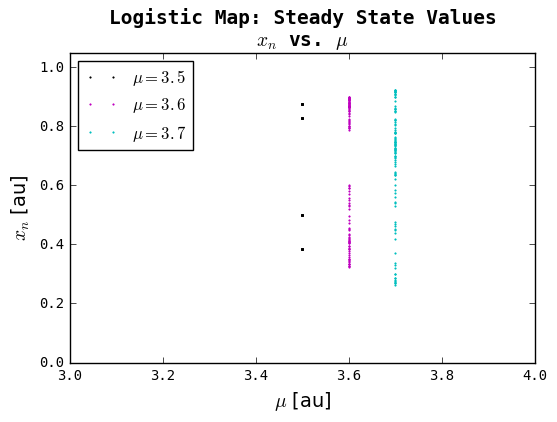

In [11]:
#Part 2,  plotting steady state vaules to obtain 
#bifurcation diagram: 
#visualzing x_n vs. mu when mu = 3.5, 3.6, and 3.7

plt.figure()

plt.plot(mu_array1[300:-1], x_array4[300:-1],'k.', markersize=2)
plt.plot(mu_array2[300:-1], x_array5[300:-1],'m.', markersize=2)
plt.plot(mu_array3[300:-1], x_array6[300:-1],'c.', markersize=2)
ax = plt.gca()

ax.set_title("Logistic Map: Steady State Values\n$x_{n}$ vs. $\mu$",\
family='monospace',size=14, weight='bold')

ax.set_xlabel('$\mu$ [au]',fontsize =14)
ax.set_ylabel('$x_{n}$ [au]',fontsize =14)

ax.set_ylim(bottom=0, top=1.05)
ax.set_xlim(left=3.00, right=4.00)

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("$\mu = 3.5$","$\mu = 3.6$","$\mu = 3.7$",),fontsize=12, loc= 2)

plt.show()

Figure 2:
-------------------------------

$x_{n}$ as function of $\mu$, where only the $x_{n}$ values in range 300 to 400 (i.e n>300) where visualized. The vertical slices represent the steady-state values of $x_{n}$ (n>>1), where increasing the value of mu (3.5,3.6,3.7) increases the number of $x_{n}$ values for the individual iterations.

-------------------------------

Now extending the plot to cover $\mu$ = 1...4. Once again decreasing the number of the $x_{n}$ values to plot (only in range 300 to 400 [i.e n>300]) helped to improve the visual aspects of the plot. The plots represents the bifurcation diagram.   

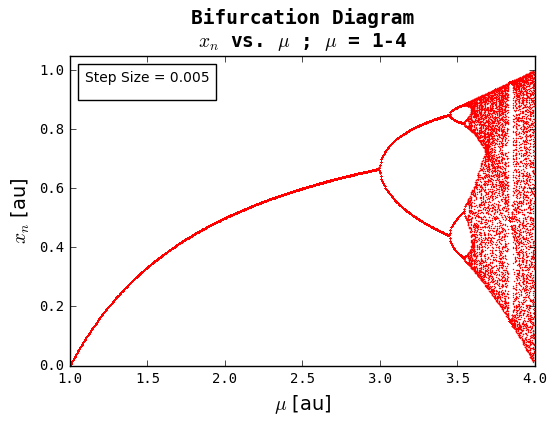

In [12]:
#Part 3, extending the plot to cover
# mu = 1....4 with step size of 0.005
plt.figure()

ax = plt.gca()

ax.set_title("Bifurcation Diagram\n\
$x_{n}$ vs. $\mu$ ; $\mu$ = 1-4",\
family='monospace',size=14, weight='bold')

ax.set_xlabel('$\mu$ [au]',fontsize =14)
ax.set_ylabel('$x_{n}$ [au]',fontsize =14)

ax.set_ylim(bottom=0, top=1.05)
ax.set_xlim(left=1.0, right=4.00)

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

bifurcation_diagram(x_0=0.6,n_0=0, n_f=400,step_size=0.005) 

plt.show()

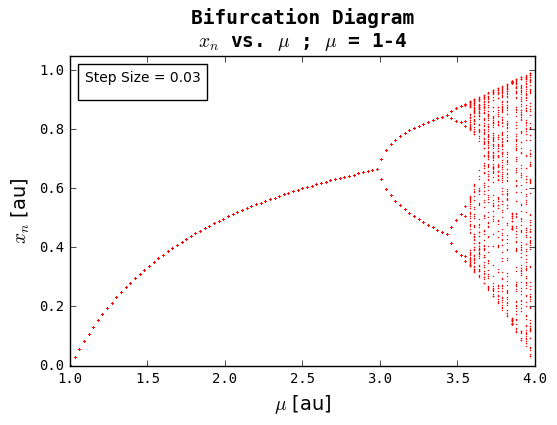

In [13]:
#Part 3, extending the plot to cover
# mu = 1....4 with step size of 0.0005
plt.figure()

ax = plt.gca()

ax.set_title("Bifurcation Diagram\n\
$x_{n}$ vs. $\mu$ ; $\mu$ = 1-4",\
family='monospace',size=14, weight='bold')

ax.set_xlabel('$\mu$ [au]',fontsize =14)
ax.set_ylabel('$x_{n}$ [au]',fontsize =14)

ax.set_ylim(bottom=0, top=1.05)
ax.set_xlim(left=1.0, right=4.00)

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

bifurcation_diagram(x_0=0.6,n_0=0, n_f=400,step_size=0.03) 

plt.show()

Figure 3:
-------------------------------
Bifurcation diagrams with different step sizes. Increasing the step sizes increased the number the $\mu$ values to individually iterate from 1 to 4 and therefore the number of fixed points(represented by vertical slices as in figure 2) increased. For each of iteration that were ran, only the $x_{n}$ in range 300 to 400 [i.e n>300]) were plotted to improve the visual aspects of the plot.   



--------------------------------

## Results

At the vertical slices (like those depicted in figure 2), past the mu parameter of 3.0, the
$x_{n}$ values veer into two separate paths. These two paths represent a system that is in the
period 2 regime. The properties are similar to the visualization of the mu = 3.1 plot in
figure 1. At approximately mu = 3.5, the $x_{n}$ values veer into four separate paths. These
four paths represent a system that is in the period 4 regime where the system oscillates
over four $x_{n}$ values. The properties are similar to the visualization of the mu = 3.1 plot
in figure 1. Then, looking closely, shortly after mu = 3.5 the $x_{n}$ values veer into eight
separate paths. These eight paths represent a system that is in the period 8 regime, where
the system oscillates over 8 $x_{n}$ values. The period is clearly doubling (from
2-4-8-16-...) until the path veer into chaotic behavior.

When visualizing the system with mu values around 3.6 (or slightly before that as noted in the lab), the paths veer into unrecognizable paths where the system appears to be at many $x_{n}$ values. The paths double until the behavior is chaotic. These properties that the veering paths in the bifurcation diagram represent can also be seen with logistic maps as in figure 1: The logistic map oscillates between 2 periods then 4 periods then 8 periods.... with eventually the system reaching chaos and there are many $x_{n}$ (i.e. for some mu values past 3.56, in the bifurcation diagram, there is an $x_{n}$ point for almost all generations).